## Imports

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
import seaborn as sns
import pandas as pd

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score, plot_confusion_matrix
from sklearn.base import clone

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [4]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['MCSDatasetNEXTCONLab.csv']))

Saving MCSDatasetNEXTCONLab.csv to MCSDatasetNEXTCONLab.csv


In [21]:
rs = 0
#df = pd.read_csv(f'MCSDatasetNEXTCONLab.csv')
df['Ligitimacy'] = df['Ligitimacy'].replace(0,-1)

trDf = df[:10139][:]
teDf = df[10139:][:]

trDf = trDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
trDf = trDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)

teDf = teDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
teDf = teDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)

trY = trDf['Ligitimacy'].values
teY = teDf['Ligitimacy'].values
trX = trDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values
teX = teDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,4421.4189,-3033.6925,1,4,13,40,40,9,91,0,131380,1
1,1,4421.5414,-3043.6606,1,4,23,40,30,9,91,0,131380,1
2,1,4421.0414,-3039.6326,1,4,33,40,20,9,91,0,121996,1
3,1,4418.6802,-3035.7741,1,4,43,40,10,9,91,0,121996,1
4,2,4477.2690,-1477.2228,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,2820,5398.0715,-1363.8483,3,4,50,40,20,1,87,0,290929,1
10135,2820,5404.4717,-1361.2367,3,5,0,40,10,1,87,0,300313,1
10136,2821,5435.2708,-2177.0007,2,19,44,40,40,5,35,0,300303,1
10137,2821,5435.5436,-2178.3546,2,19,54,40,30,5,35,0,300303,1


#Q1

## KNN Classifier

In [6]:
acc_base = {}

K Nearst Neighbors
Accuracy:  0.9811277330264672


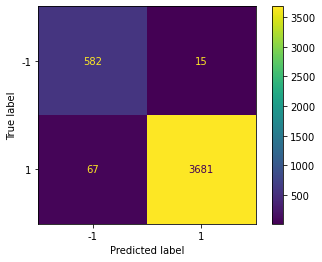

In [14]:
knn = KNeighborsClassifier(3)
knn.fit(trX, trY)
pred = knn.predict(teX)
acc = accuracy_score(teY, pred)
print("K Nearst Neighbors")
print("Accuracy: ", acc)
acc_base['KNN'] = acc*100
confusion_matrix(teY, pred)
plot_confusion_matrix(knn,teX,teY)

## Logistic Regression

Logistic Regression
Accuracy:  0.8626006904487917


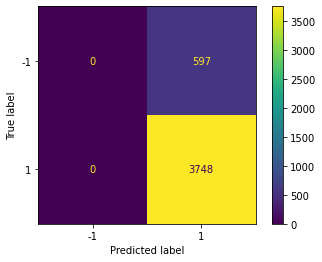

In [15]:
lr = LogisticRegression()
lr.fit(trX, trY)
pred = lr.predict(teX)
acc = accuracy_score(teY, pred)
print("Logistic Regression")
print("Accuracy: ", acc)
acc_base['LR'] = acc*100
confusion_matrix(teY, pred)
plot_confusion_matrix(lr,teX,teY)

## SVM Classifier

SVM
Accuracy:  0.8626006904487917


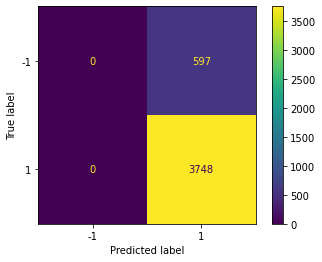

In [17]:
svc = SVC()
svc.fit(trX, trY)
pred = svc.predict(teX)
acc = accuracy_score(teY, pred)
print("SVM")
print("Accuracy: ", acc)
acc_base['SVM'] = acc*100
confusion_matrix(teY, pred)
plot_confusion_matrix(svc,teX, teY)

## Plotting Results of Q1

In [18]:
def plot_bar(acc_base, title="Base Line", ax=plt):
  ax.bar(acc_base.keys(), acc_base.values(), color = ['r','g','b'])
  ax.set_title(title)
  ax.set_xlabel("Classifier")
  ax.set_ylabel("Accuracy %")

Text(0, 0.5, 'Accuracy %')

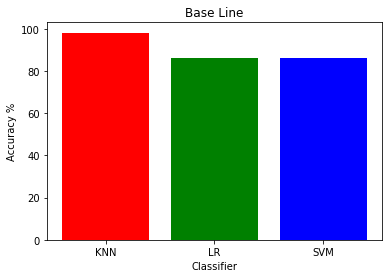

In [19]:
plt.bar(acc_base.keys(), acc_base.values(), color = ['r','g','b'])
plt.title("Base Line")
plt.xlabel("Classifier")
plt.ylabel("Accuracy %")

# Q2

In [20]:
def subcategorybar(X, vals, width=0.8, ax=plt):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        ax.bar((_X - width/2. + i/float(n)*width), (vals[i]), 
                width=(width/float(n)), align="edge")   
    ax.xticks(_X, X)
    ax.legend()

## Smote on all Models

No handles with labels found to put in legend.


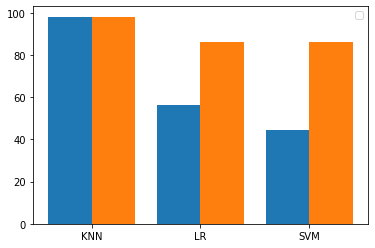

In [12]:
acc_sampler1 = {}

resampler = SMOTE(random_state=rs)
reTrX, reTrY = resampler.fit_resample(trX, trY)

estimator = KNeighborsClassifier()
score = estimator.fit(reTrX, reTrY).score(teX, teY)

acc_sampler1['KNN'] = score*100

resampler = SMOTE(random_state=rs)
reTrX, reTrY = resampler.fit_resample(trX, trY)

estimator = LogisticRegression()
score = estimator.fit(reTrX, reTrY).score(teX, teY)

acc_sampler1['LR'] = score*100

resampler = SMOTE(random_state=rs)
reTrX, reTrY = resampler.fit_resample(trX, trY)

estimator = SVC()
score = estimator.fit(reTrX, reTrY).score(teX, teY)

acc_sampler1['SVM'] = score*100

subcategorybar(acc_sampler1.keys(),[acc_sampler1.values(), acc_base.values()])


## ADASYN on all models

No handles with labels found to put in legend.


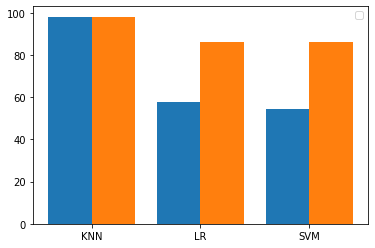

In [13]:
acc_sampler2 = {}

resampler = ADASYN(random_state=rs)
reTrX, reTrY = resampler.fit_resample(trX, trY)

estimator = KNeighborsClassifier()
score = estimator.fit(reTrX, reTrY).score(teX, teY)

acc_sampler2['KNN'] = score*100

resampler = ADASYN(random_state=rs)
reTrX, reTrY = resampler.fit_resample(trX, trY)

estimator = LogisticRegression()
score = estimator.fit(reTrX, reTrY).score(teX, teY)

acc_sampler2['LR'] = score*100

resampler = ADASYN(random_state=rs)
reTrX, reTrY = resampler.fit_resample(trX, trY)

estimator = SVC()
score = estimator.fit(reTrX, reTrY).score(teX, teY)

acc_sampler2['SVM'] = score*100

subcategorybar(acc_sampler2.keys(),[acc_sampler2.values(), acc_base.values()])


## Random Under Sampling on all models

No handles with labels found to put in legend.


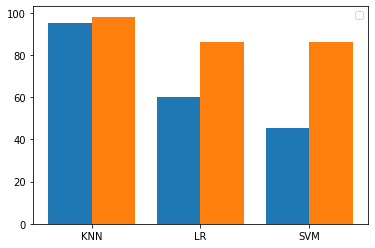

In [14]:
acc_sampler3 = {}

resampler = RandomUnderSampler(random_state=rs)
reTrX, reTrY = resampler.fit_resample(trX, trY)

estimator = KNeighborsClassifier()
score = estimator.fit(reTrX, reTrY).score(teX, teY)

acc_sampler3['KNN'] = score*100

resampler = RandomUnderSampler(random_state=rs)
reTrX, reTrY = resampler.fit_resample(trX, trY)

estimator = LogisticRegression()
score = estimator.fit(reTrX, reTrY).score(teX, teY)

acc_sampler3['LR'] = score*100

resampler = RandomUnderSampler(random_state=rs)
reTrX, reTrY = resampler.fit_resample(trX, trY)

estimator = SVC()
score = estimator.fit(reTrX, reTrY).score(teX, teY)

acc_sampler3['SVM'] = score*100

subcategorybar(acc_sampler3.keys(),[acc_sampler3.values(), acc_base.values()])


#Q3

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

##Applying PCA on training data with KNN by best features

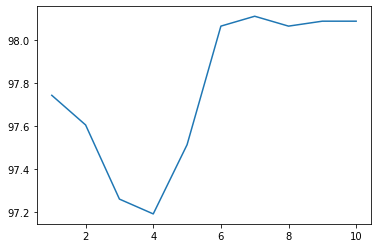

In [16]:
acc_pca = {"KNN":[]}
for i in range(1,trX.shape[1]+1):

  pca = PCA(n_components=i)
  X_pca = pca.fit_transform(trX)

  knn = KNeighborsClassifier()
  knn.fit(X_pca, trY)

  yPred_pca = knn.predict(pca.transform(teX))
  acc_pca["KNN"].append((i, accuracy_score(teY, yPred_pca)*100))

plt.plot(range(1, trX.shape[1]+1), pd.DataFrame(acc_pca["KNN"])[1])

In [33]:
#X_pca= np.array(X_pca)
#top6 =  sorted(X_pca, key=lambda x: x[0][6], reverse=True)[:6]
idx = np.argpartition(-X_pca[...,-1].flatten(), 6)
X_pca=X_pca[idx[:6]]
print(X_pca)


[[ 1.35257720e+05 -4.90173008e+02 -3.05198271e+01  1.74133026e+01
  -1.46238040e+01 -6.28262571e+00 -5.49556372e+00  2.82158157e+00
   4.38222771e+00  8.56053506e-01]
 [ 1.35257720e+05 -5.00389180e+02 -3.04322450e+01  2.28861499e+01
  -3.67805858e+00 -5.64015909e+00  1.56155269e+00  2.79027219e+00
   4.40034548e+00  8.54480185e-01]
 [ 1.35256733e+05 -4.82118424e+02 -3.05737182e+01  1.19806395e+01
  -2.54890970e+01 -9.20190716e+00 -1.25850860e+01  2.85816607e+00
   4.36461387e+00  8.59124692e-01]
 [ 1.82176414e+05 -3.94932952e+02 -1.67338311e+01  1.15152800e+01
  -2.80318498e+01  6.98132390e+00 -1.22937252e+01  2.79149751e+00
   4.33109111e+00  8.48277968e-01]
 [ 1.82177427e+05 -4.03437050e+02 -1.66068275e+01  1.70285602e+01
  -1.70078793e+01  5.43383541e+00 -5.26852284e+00  2.76234297e+00
   4.35072256e+00  8.48091970e-01]
 [ 1.82175492e+05 -2.46895372e+02  3.03732709e+01  3.38138251e+01
   5.02190447e+00 -8.52367308e+00 -1.27237590e+01  2.79899924e+00
   4.46719890e+00  8.47553832e-01

## Applying PCA with logistic regression by best features

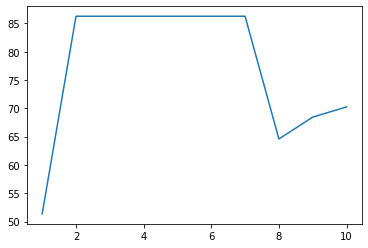

In [20]:
acc_pca["LR"] = []
for i in range(1,trX.shape[1]+1):

  pca = PCA(n_components=i)
  X_pca = pca.fit_transform(trX)

  LR = LogisticRegression()
  LR.fit(X_pca, trY)

  yPred_pca = LR.predict(pca.transform(teX))
  acc_pca["LR"].append((i, accuracy_score(teY, yPred_pca)*100))

plt.plot(range(1, trX.shape[1]+1), pd.DataFrame(acc_pca["LR"])[1])

##Applying PCA with SVM by best features

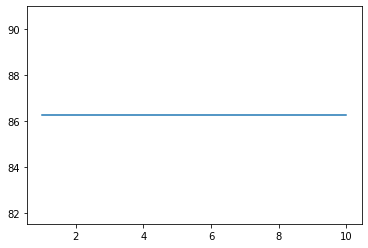

In [ ]:
acc_pca["SVM"] = []
for i in range(1,trX.shape[1]+1):

  pca = PCA(n_components=i)
  X_pca = pca.fit_transform(trX)

  svm = SVC()
  svm.fit(X_pca, trY)

  yPred_pca = svm.predict(pca.transform(teX))
  acc_pca["SVM"].append((i, accuracy_score(teY, yPred_pca)*100))

plt.plot(range(1, trX.shape[1]+1), pd.DataFrame(acc_pca["SVM"])[1])

## Plotting PCA results vs original Baseline

No handles with labels found to put in legend.


Text(0, 0.5, 'Accuracy %')

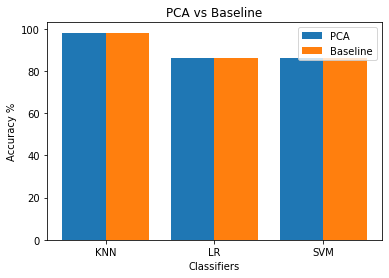

In [ ]:
subcategorybar(acc_pca.keys(),[[acc_pca["KNN"][6][1],acc_pca["LR"][2][1],acc_pca["SVM"][1][1]], acc_base.values()])
plt.legend(['PCA', 'Baseline'])
plt.title("PCA vs Baseline")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy %")

## Applying TSN-E to KNN

In [ ]:
acc_tsne = {"KNN":[]}

tsne = TSNE(n_components=2)
X_tsne= tsne.fit_transform(trX)

knn = KNeighborsClassifier()
knn.fit(X_tsne, trY)

yPred_tsne = knn.predict(tsne.fit_transform(teX))
acc_tsne["KNN"].append((2, accuracy_score(teY, yPred_tsne)*100))

## Applying TSN-E to Logistic Regression

In [ ]:
acc_tsne["LR"] = []

tsne = TSNE(n_components=2)
X_tsne= tsne.fit_transform(trX)

lr = LogisticRegression()
lr.fit(X_tsne, trY)

yPred_tsne = lr.predict(tsne.fit_transform(teX))
acc_tsne["LR"].append((2, accuracy_score(teY, yPred_tsne)*100))


## Applying TSN-E to SVM

In [ ]:
acc_tsne["SVM"] = []

tsne = TSNE(n_components=2)
X_tsne= tsne.fit_transform(trX)

lr = LogisticRegression()
lr.fit(X_tsne, trY)

yPred_tsne = lr.predict(tsne.fit_transform(teX))
acc_tsne["SVM"].append((2, accuracy_score(teY, yPred_tsne)*100))


## Plotting PCA vs TSN-E vs original baseline

No handles with labels found to put in legend.


Text(0, 0.5, 'Accuracy %')

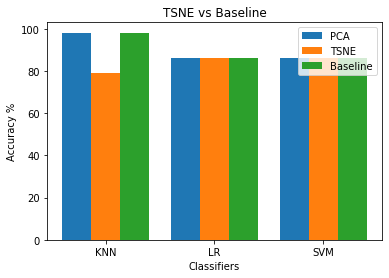

In [ ]:
subcategorybar(acc_tsne.keys(),[[acc_pca["KNN"][6][1],acc_pca["LR"][2][1],acc_pca["SVM"][1][1]],[acc_tsne["KNN"][0][1],acc_tsne["LR"][0][1],acc_tsne["SVM"][0][1]], acc_base.values()])
plt.legend(['PCA', 'TSNE', 'Baseline'])
plt.title("TSNE vs Baseline")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy %")

#Q4

In [18]:
rs = 0
estimators = {"LR":LogisticRegression(random_state=rs), "SVM":SVC(random_state=rs), "KNN":KNeighborsClassifier()}



## Applying Stacking with LR VS all models




Stacking Weighted Score (Aggregator LR)
Stacking (Aggregator LR): 0.8626006904487917


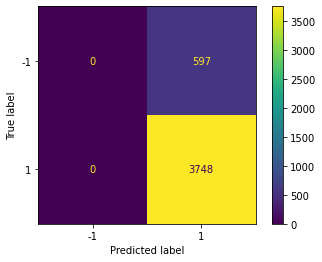

In [21]:
acc_stack = {"KNN": 0}
print(f'Stacking Weighted Score (Aggregator LR)')
stacking = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], LogisticRegression(), n_jobs=-1)
stacking.fit(X_pca, trY)
predY = stacking.predict(teX)
acc_stack["LR"] = accuracy_score(teY, predY)
plot_confusion_matrix(stacking, teX, teY)
print(f'Stacking (Aggregator LR): {acc_stack["LR"]}')


## ## Applying Stacking with SVM VS all models

Stacking Weighted Score (Aggregator SVM)
Stacking (Aggregator SVM): 0.980897583429229


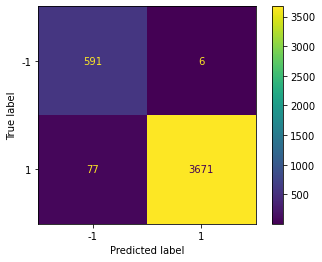

In [ ]:

print(f'Stacking Weighted Score (Aggregator SVM)')
stacking = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], SVC(), n_jobs=-1)
stacking.fit(trX, trY)
predY = stacking.predict(teX)
acc_stack["SVM"] = accuracy_score(teY, predY)
plot_confusion_matrix(stacking, teX, teY)
print(f'Stacking (Aggregator SVM): {acc_stack["SVM"]}')


## ## Applying Stacking with KNN VS all models

Stacking Weighted Score (Aggregator KNN)
Stacking (Aggregator KNN): 0.9217491369390104


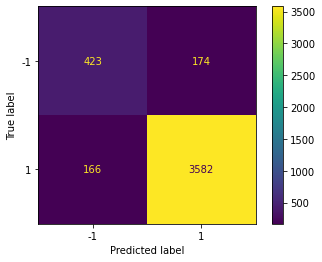

In [13]:

print(f'Stacking Weighted Score (Aggregator KNN)')
stacking = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], KNeighborsClassifier(), n_jobs=-1)
stacking.fit(trX, trY)
predY = stacking.predict(teX)
acc_stack["KNN"] = accuracy_score(teY, predY)
plot_confusion_matrix(stacking, teX, teY)
print(f'Stacking (Aggregator KNN): {acc_stack["KNN"]}')

##Plotting & Comparing PCA vs stack vs tsne vs traditional baseline

No handles with labels found to put in legend.


Text(0, 0.5, 'Accuracy %')

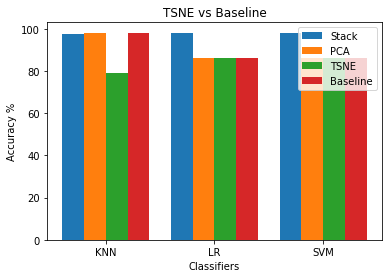

In [ ]:
subcategorybar(acc_tsne.keys(),[[acc_stack["KNN"]*100,acc_stack["LR"]*100,acc_stack["SVM"]*100],
                                [acc_pca["KNN"][6][1],acc_pca["LR"][2][1],acc_pca["SVM"][1][1]],
                                [acc_tsne["KNN"][0][1],acc_tsne["LR"][0][1],acc_tsne["SVM"][0][1]],
                                acc_base.values()])
plt.legend(['Stack', 'PCA', 'TSNE', 'Baseline'])
plt.title("TSNE vs Baseline")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy %")


## Pipeline


In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

Stacking Weighted Score (Aggregator AdaBoost)
Pipe: 0.9288837744533948


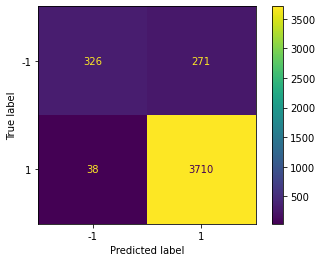

In [11]:
rs = 0
estimators = {"AdaBoost":AdaBoostClassifier(random_state=rs)}
acc_stack = {"KNN": 0}
print(f'Stacking Weighted Score (Aggregator AdaBoost)')
stacking = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], AdaBoostClassifier(random_state=rs), n_jobs=-1)
pipe = Pipeline([('PCA', PCA(n_components=7)),
                 ('Stacking', AdaBoostClassifier(random_state=rs))])
pipe.fit(trX, trY)
acc_stack["Pipe"] = pipe.score(teX, teY)
plot_confusion_matrix(pipe, teX, teY)
print(f'Pipe: {acc_stack["Pipe"]}')

# Part 2

In [24]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
# make it easier to understand by importing the required libraries within keras
from tensorflow.keras.layers import Dense, Flatten
from statistics import mean
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Apply scaling to features (MinMaxScalar)

In [ ]:
rs = 0
#df = pd.read_csv(f'MCSDatasetNEXTCONLab.csv')
# df['Ligitimacy'] = df['Ligitimacy'].replace(0,-1)
df.Latitude = (df.Latitude - 45)*10000
df.Longitude = (df.Longitude + 75)*10000
df = df.drop(columns=['ID', 'Day'])

from sklearn.preprocessing import minmax_scale
X = minmax_scale(df[df.columns[:-1]])
Y = minmax_scale(df[df.columns[-1]])

trY = Y[:10139]
teY = Y[10139:]
trX = X[:10139]
teX = X[10139:]

## Apply MLP classifier to original data

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

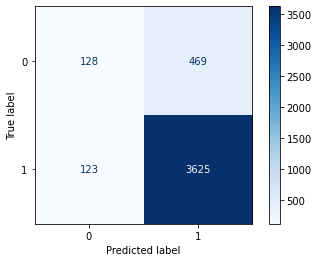

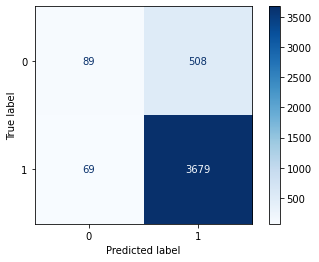

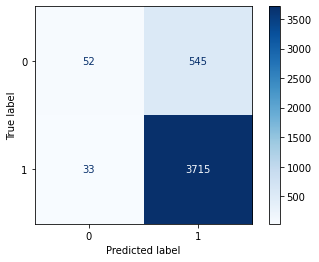

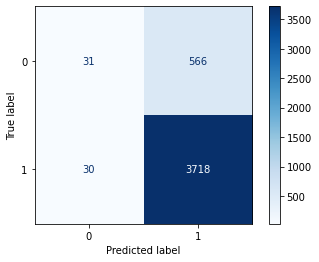

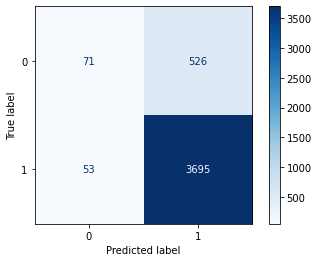

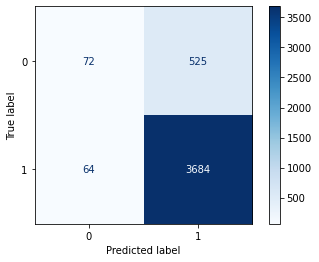

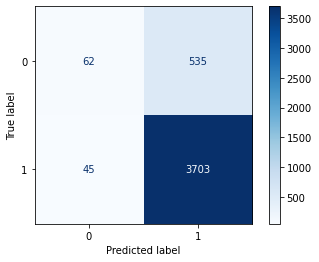

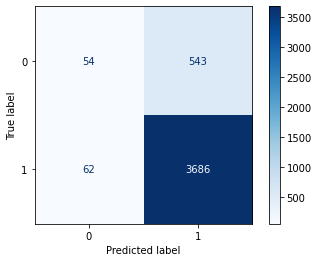

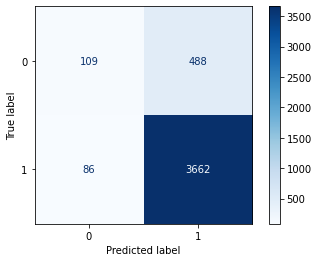

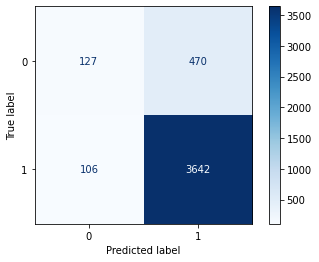

In [ ]:
h_total_train=np.empty((0,10))
h_total_val=np.empty((0,10))
total_acc=[]
number_of_runs=10
for i in range(number_of_runs):
  mlp =keras.models.Sequential([
  Dense(15, activation='tanh', input_shape=(10,)),
  Dense(15, activation='tanh'),
  Dense(2, activation='softmax')])
  mlp.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.02, momentum=0.01), metrics=['accuracy'])
  h = mlp.fit(trX, trY, epochs=10, batch_size=32, validation_data=(teX, teY), verbose=0)
  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  total_acc.append(mlp.evaluate(teX,teY, verbose=0)[1])
  cm = confusion_matrix(teY, mlp.predict(teX).argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap=plt.cm.Blues)
  # ConfusionMatrixDisplay(confusion_matrix=confusion_matrix())
plt.show()

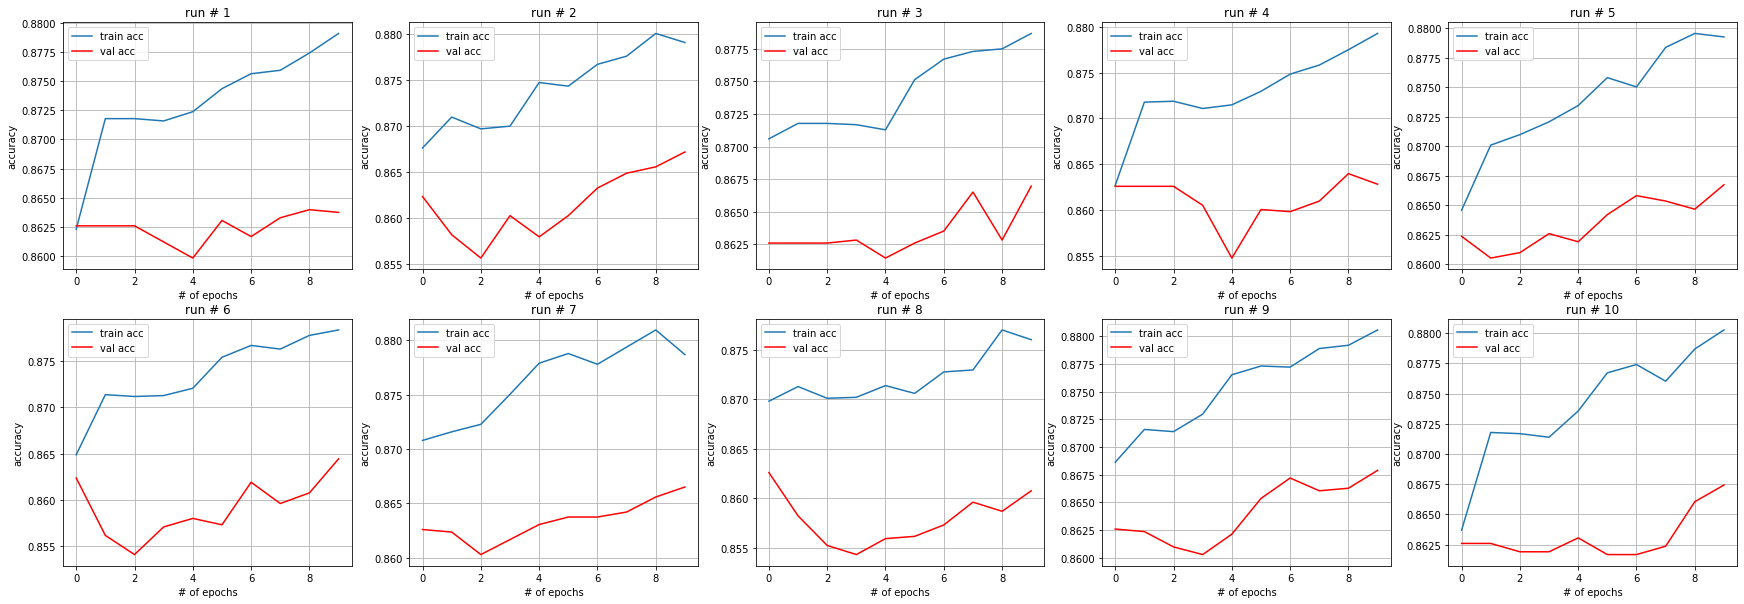

In [ ]:
for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()


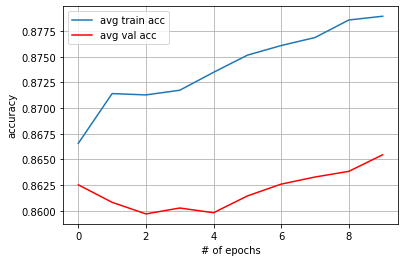

In [ ]:
h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()


In [ ]:
np.mean(total_acc)

0.8654545366764068

## Applying wrapper to MLP improve baseline performance

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
knn = KNeighborsClassifier()
sfs_acc = dict()
sfs_total_train = []
sfs_total_val = []
sfs_table = []
for i in range(2,9):
  sfs = SequentialFeatureSelector(knn, n_features_to_select=i)
  sfs.fit(trX, trY)
  new_x = sfs.transform(trX)
  new_tex = sfs.transform(teX)
  sfs_table.append(sfs.get_support())
  mlp =keras.models.Sequential([
  Dense(15, activation='tanh', input_shape=(10,)),
  Dense(15, activation='tanh'),
  Dense(2, activation='softmax')])
  mlp.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.02, momentum=0.01), metrics=['accuracy'])
  h = mlp.fit(trX, trY, epochs=10, batch_size=32, validation_data=(teX, teY), verbose=0)
  sfs_total_train.append(np.array([h.history['accuracy']]))
  sfs_total_val.append(np.array([h.history['val_accuracy']]))
  sfs_acc[i] = [mlp.evaluate(teX,teY, verbose=0)[1], new_x, new_tex]



## Plotting Wrapper with MLP Results

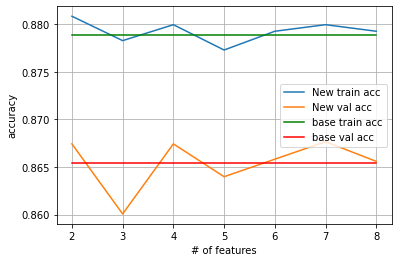

In [ ]:
plt.plot(range(2,9), [tr[0][-1] for tr in sfs_total_train])
plt.plot(range(2,9), [tr[0][-1] for tr in sfs_total_val])

h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(range(2,9),[h_avg_train[-1]]*7, 'g')
plt.plot(range(2,9),[h_avg_val[-1]]*7, 'r')
plt.legend(['New train acc', 'New val acc','base train acc', 'base val acc'])
plt.xlabel("# of features")
plt.ylabel("accuracy")
plt.grid()

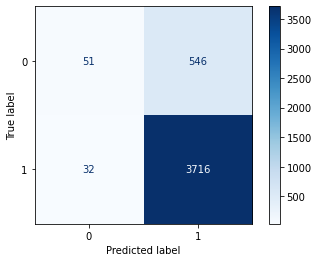

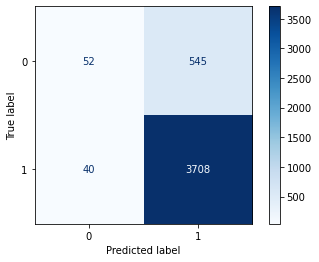

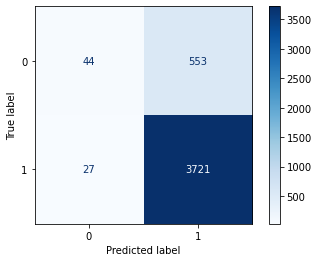

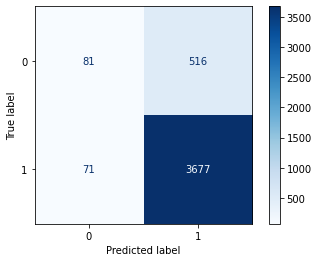

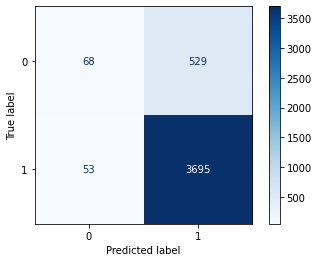

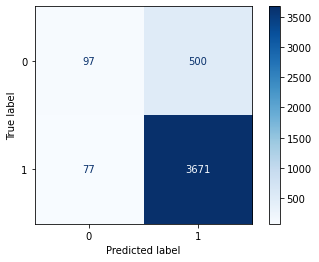

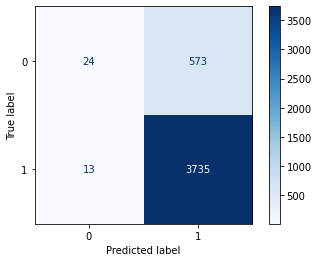

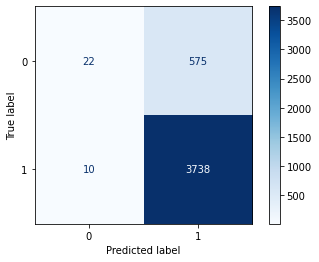

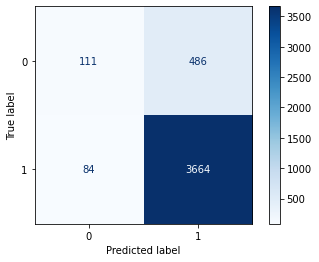

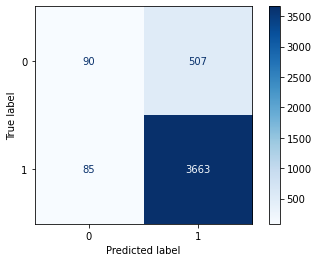

In [ ]:
h_total_train1=np.empty((0,10))
h_total_val1=np.empty((0,10))
total_acc1=[]
number_of_runs=10
nf = 8
for i in range(number_of_runs):
  mlp =keras.models.Sequential([
  Dense(15, activation='tanh', input_shape=(nf,)),
  Dense(15, activation='tanh'),
  Dense(2, activation='softmax')])
  mlp.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.02, momentum=0.01), metrics=['accuracy'])
  h = mlp.fit(sfs_acc[nf][1], trY, epochs=10, batch_size=32, validation_data=(sfs_acc[nf][2], teY), verbose=0)
  h_total_train1=np.append(h_total_train1,np.array([h.history['accuracy']]),axis=0)
  h_total_val1=np.append(h_total_val1,np.array([h.history['val_accuracy']]),axis=0)
  total_acc1.append(mlp.evaluate(sfs_acc[nf][2],teY, verbose=0)[1])
  cm = confusion_matrix(teY, mlp.predict(sfs_acc[nf][2]).argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap=plt.cm.Blues)
  # ConfusionMatrixDisplay(confusion_matrix=confusion_matrix())
plt.show()

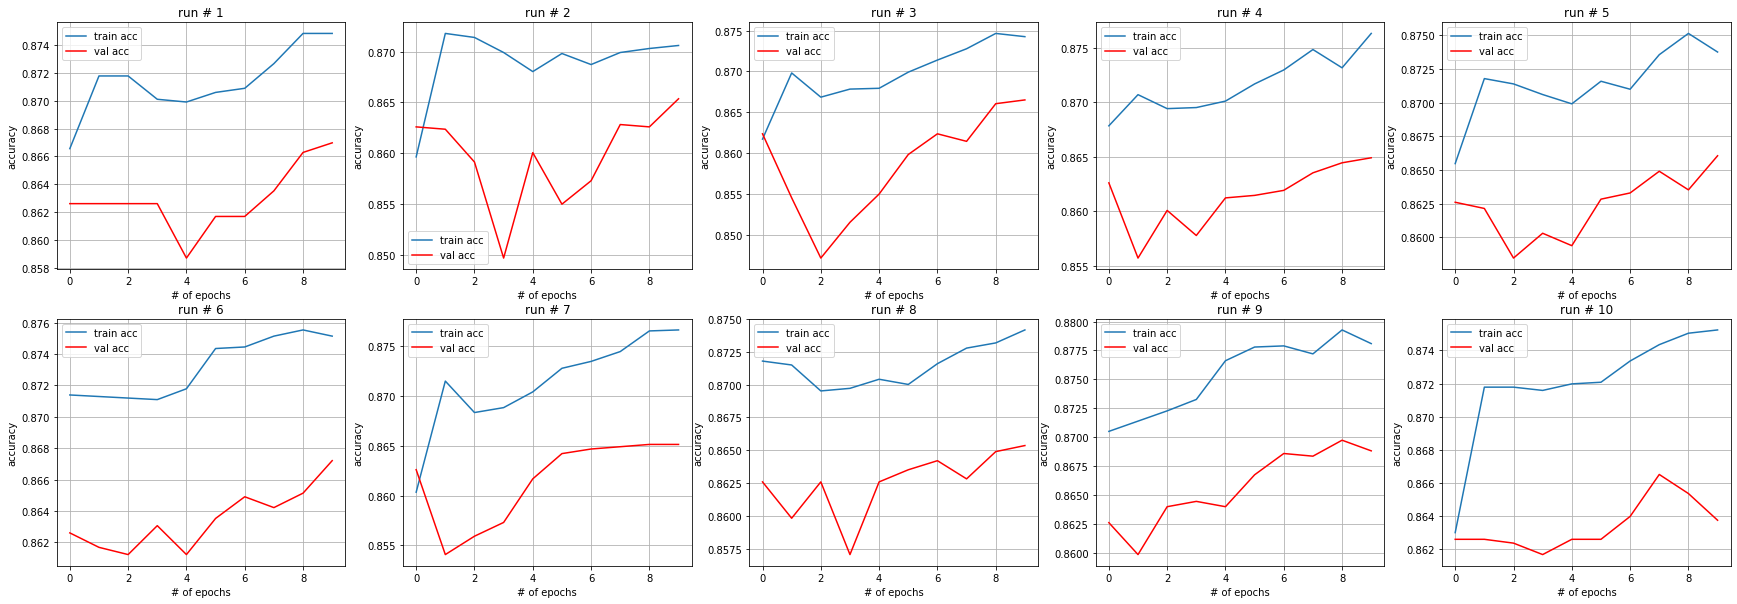

In [ ]:
for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train1[i])
  plt.plot(h_total_val1[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()


##Plotting Average accuracy vs baseline

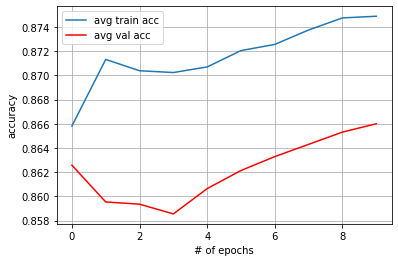

In [ ]:
h_avg_train2=np.average(h_total_train1,axis=0)
h_avg_val2=np.average(h_total_val1,axis=0)
plt.plot(h_avg_train2)
plt.plot(h_avg_val2, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

## Applying SOM to & Plot k (X-axis) versus average accuracy

In [ ]:
!pip install sklearn_som

In [ ]:
from sklearn_som.som import SOM
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.utils.multiclass import unique_labels
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
df_org = np.append(trX,teX, axis=0)
y_org = np.append(trY,teY, axis=0)
sfs_org = np.append(sfs_acc[8][1],sfs_acc[8][2], axis=0)

In [ ]:
def avg_mlp(df, y):
  h_total_train3=np.empty((0,10))
  h_total_val3=np.empty((0,10))
  X_train, X_test, y_train, y_test = train_test_split(df, y, stratify=y, test_size=0.3)
  for i in range(10):
    mlp =keras.models.Sequential([
    Dense(15, activation='tanh', input_shape=(df.shape[1],)),
    Dense(15, activation='tanh'),
    Dense(2, activation='softmax')])
    mlp.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.02, momentum=0.01), metrics=['accuracy'])
    h = mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    h_total_train3=np.append(h_total_train3,np.array([h.history['accuracy']]),axis=0)
    h_total_val3=np.append(h_total_val3,np.array([h.history['val_accuracy']]),axis=0)
  return np.mean(h_total_train3), np.mean(h_total_val3) 

## Creating dataframe with clusters labels depending on PKI

In [ ]:
acc_avg = []
acc_val = []
for k in range(2, 9):
    som = SOM(m=k, n=k, dim=df_org.shape[1])
    som.fit(df_org)
    new_df_som = np.concatenate([df_org, np.reshape(som.predict(df_org), (-1, 1))], axis=1)
    acc, val_acc = avg_mlp(new_df_som, y_org)
    acc_avg.append(acc)
    acc_val.append(val_acc)


## Plotting average accuracy vs no. of Clusters

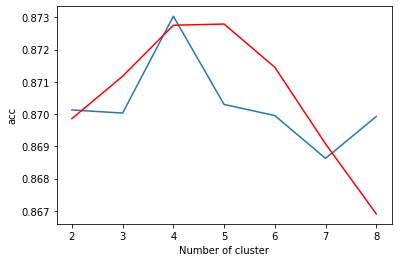

In [ ]:
plt.figure()
plt.plot(range(2, 9), acc_avg)
plt.plot(range(2, 9), acc_val, 'r')
# plt.plot(range(2, 9), [h_avg_train2[-1]]*7,'g')
# plt.plot(range(2, 9), [h_avg_val2[-1]]*7 )
# plt.legend([''])
plt.xlabel("Number of cluster")
plt.ylabel("acc")
plt.show()

## Tunning Parameters of MLP 

### No. of hidden layers

In [ ]:
acc1 = []
acc_val1 = []

acc_avg1 = []
acc_val_avg1 = []

h_total_train4 = np.empty((0,10))
h_total_val4= np.empty((0,10))
som = SOM(m=3, n=3, dim=df_org.shape[1])
som.fit(df_org)
new_df_som = np.concatenate([df_org, np.reshape(som.predict(df_org), (-1, 1))], axis=1)
X_train, X_test, y_train, y_test = train_test_split(new_df_som, y_org, stratify=y_org, test_size=0.3)
for layers in range(3, 11):
  for neuron in range(10,31):
    mlp =keras.models.Sequential()
    mlp.add(Dense(15, activation='tanh', input_shape=(new_df_som.shape[1],)))
    for _ in range(layers):
      mlp.add(Dense(neuron, activation='tanh'))
  
    mlp.add(Dense(2, activation='softmax'))
    mlp.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.02, momentum=0.01), metrics=['accuracy'])
    h = mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    h_total_train4=np.append(h_total_train4,np.array([h.history['accuracy']]),axis=0)
    h_total_val4=np.append(h_total_val4,np.array([h.history['val_accuracy']]),axis=0)
    acc1.append(h.history['accuracy'][-1])
    acc_val1.append(h.history['val_accuracy'][-1] )
  acc_avg1.append(np.mean(acc1))
  acc_val_avg1.append(np.mean(acc_val1) )
        


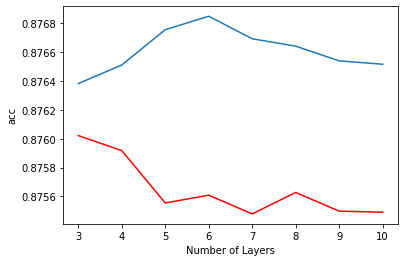

In [ ]:
plt.figure()
plt.plot(range(3, 11), acc_avg1)
plt.plot(range(3, 11), acc_val_avg1, 'r')
# plt.plot(range(2, 9), [h_avg_train2[-1]]*7,'g')
# plt.plot(range(2, 9), [h_avg_val2[-1]]*7 )
# plt.legend([''])
plt.xlabel("Number of Layers")
plt.ylabel("acc")
plt.show()

### No. of neurons

In [ ]:
acc_avg2 = []
acc_val2 = []
h_total_train5 = np.empty((0,10))
h_total_val5 = np.empty((0,10))
for neuron in range(10,31):
  mlp =keras.models.Sequential()
  mlp.add(Dense(15, activation='tanh', input_shape=(new_df_som.shape[1],)))
  mlp.add(Dense(neuron, activation='tanh'))
  mlp.add(Dense(neuron, activation='tanh'))
  mlp.add(Dense(neuron, activation='tanh'))
  mlp.add(Dense(2, activation='softmax'))


  mlp.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.02, momentum=0.01), metrics=['accuracy'])
  h = mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
  h_total_train5=np.append(h_total_train4,np.array([h.history['accuracy']]),axis=0)
  h_total_val5=np.append(h_total_val4,np.array([h.history['val_accuracy']]),axis=0)
  acc_avg2.append(h.history['accuracy'][-1])
  acc_val2.append(h.history['val_accuracy'][-1])


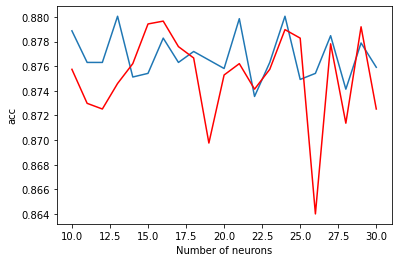

In [ ]:

plt.figure()
plt.plot(range(10, 31), acc_avg2)
plt.plot(range(10, 31), acc_val2, 'r')
# plt.plot(range(2, 9), [h_avg_train2[-1]]*7,'g')
# plt.plot(range(2, 9), [h_avg_val2[-1]]*7 )
# plt.legend([''])
plt.xlabel("Number of neurons")
plt.ylabel("acc")
plt.show()

## Comparing final results with original baseline 

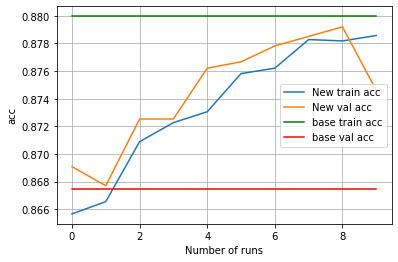

In [ ]:
neuron = 23
mlp =keras.models.Sequential()
mlp.add(Dense(15, activation='tanh', input_shape=(new_df_som.shape[1],)))
mlp.add(Dense(neuron, activation='tanh'))
mlp.add(Dense(neuron, activation='tanh'))
mlp.add(Dense(neuron, activation='tanh'))
mlp.add(Dense(2, activation='softmax'))

mlp.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.02, momentum=0.01), metrics=['accuracy'])
h = mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)


plt.figure()
plt.plot(range(10), h.history['accuracy'])
plt.plot(range(10), h.history['val_accuracy'])
plt.plot(range(10),[sfs_total_train[2][0][-1]]*10, 'g')
plt.plot(range(10),[sfs_total_val[2][0][-1]]*10, 'r')
plt.legend(['New train acc', 'New val acc','base train acc', 'base val acc'])
plt.xlabel("Number of runs")
plt.ylabel("acc")
plt.grid()